## Gaussian Mixture Model
### PUCMINAS 

Nahari Terena

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator


warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

In [2]:
data = 'C://Users//Olnalu//Desktop//Nahari//PUCMINAS//Dados//base_final.csv'

df = pd.read_csv(data, sep = ";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22442 entries, 0 to 22441
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   NUMERODO    22442 non-null  int64
 1   IND_RC      22442 non-null  int64
 2   QTDGESTANT  22442 non-null  int64
 3   QTDFILVIVO  22442 non-null  int64
 4   GESTACAO    22442 non-null  int64
 5   PESO        22442 non-null  int64
 6   QTDPARTNOR  22442 non-null  int64
 7   TPROBSON    22442 non-null  int64
 8   PARIDADE    22442 non-null  int64
 9   CONSULTAS   22442 non-null  int64
 10  KOTELCHUCK  22442 non-null  int64
 11  IDADEMAE    22442 non-null  int64
 12  QTDFILMORT  22442 non-null  int64
 13  IDADE       22442 non-null  int64
 14  CONSPRENAT  22442 non-null  int64
 15  QTDPARTCES  22442 non-null  int64
dtypes: int64(16)
memory usage: 2.7 MB


In [4]:
df.drop(['NUMERODO', 'IND_RC'], axis=1, inplace=True)

## Normalizando os valores

In [5]:
ms = MinMaxScaler()
cols = df.columns

X = ms.fit_transform(df)
X = pd.DataFrame(X, columns = [cols])

In [6]:
X.head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES
0,0.066667,0.071429,0.8,0.472464,0.000000,0.4,1.0,0.375,0.500,0.103448,0.0,1.0,0.080808,0.025
1,0.066667,0.071429,0.2,0.070290,0.033333,0.7,1.0,0.250,0.250,0.206897,0.0,0.0,0.040404,0.000
2,0.066667,0.071429,0.4,0.127536,0.000000,0.9,1.0,0.250,0.375,0.114943,0.0,0.0,0.060606,0.025
3,0.000000,0.000000,0.6,0.350000,0.000000,0.9,0.0,0.250,0.250,0.091954,0.0,0.0,0.050505,0.000
4,0.066667,0.071429,0.6,0.469565,0.033333,0.9,1.0,0.250,1.000,0.160920,0.0,1.0,0.050505,0.000


## Feature Scaling

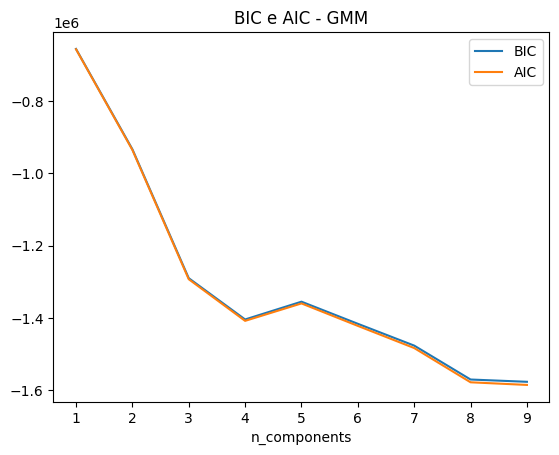

In [7]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('BIC e AIC - GMM')
plt.xlabel('n_components');

In [8]:
range_n_components = [2, 3, 4, 5, 6, 7, 8]

for num_componentes in range_n_components:
    
    Gmm = GaussianMixture(n_components=num_componentes).fit(X)
        
    silhouette_avg = np.exp(Gmm.score_samples(X)).sum()
    print("Para {0} grupos, a silhouette score é de {1}".format(num_componentes, silhouette_avg))

Para 2 grupos, a silhouette score é de 4.5283205812061597e+21
Para 3 grupos, a silhouette score é de 4.528397756721337e+21
Para 4 grupos, a silhouette score é de 1.8672887139075489e+22
Para 5 grupos, a silhouette score é de 1.866790246847839e+22
Para 6 grupos, a silhouette score é de 7.042841221285497e+22
Para 7 grupos, a silhouette score é de 2.6525774383379443e+24
Para 8 grupos, a silhouette score é de 6.875296850575067e+24


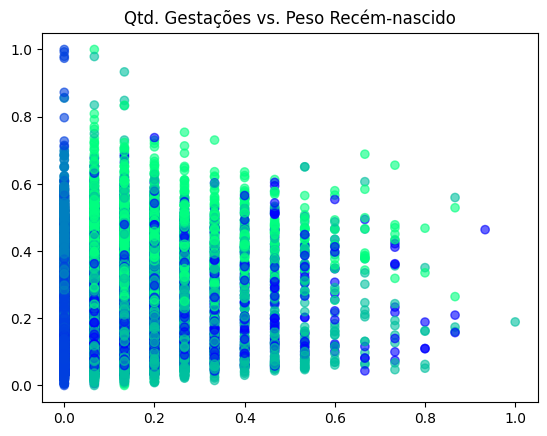

In [19]:
plt.scatter(X['QTDGESTANT'], X['PESO'],  
           c = GaussianMixture(n_components = 5).fit_predict(X), cmap =plt.cm.winter, alpha = 0.6) 
plt.title("Qtd. Gestações vs. Peso Recém-nascido")
plt.show() 